In [1]:
import sys
sys.path.append('../COIL/include')
from Prob7Coil0 import Prob7Coil0
sys.path.append('../bin/Release')
from EMPY_Field import *
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 
cpp_solver="EMPY"
from ngsolve import *
from netgen.occ import *
from netgen.webgui import Draw as DrawGeo
from ngsolve.webgui import Draw

coils = Prob7Coil0()
DrawGeo(coils.geo)

a=12.5e-3
b=50e-3
w1=50e-3
rc=w1+25e-3+2*a
box=Box((0,0,-b),(rc,rc,b))
model=coils.geo*box
#DrawGeo(model)
model.faces.Min(Y).name="theta0"
model.faces.Min(X).name="thetahalfpi"
geo =OCCGeometry(model)
curveOrder=3
mesh=Mesh (geo.GenerateMesh(maxh=0.5e-2)).Curve(curveOrder) 
#Draw(mesh)
B=Bfield(coils.field)
with TaskManager():
    Draw(B,mesh, order=3)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 67469    matrix size= 1386977.0
shift parameter= 1.02
minimum residual= 3.0885721736578e-08  at iteraions:  1923


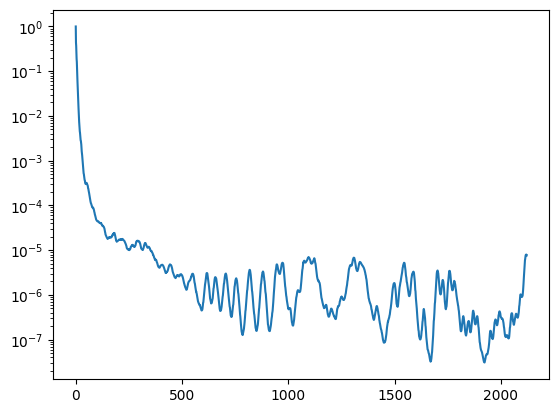

結果のノルム: 2.4141530364627574e-06
power=  5.784382352013718e-08


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 65481    matrix size= 1332201.0
shift parameter= 1.04
minimum residual= 8.512874687799532e-17  at iteraions:  691


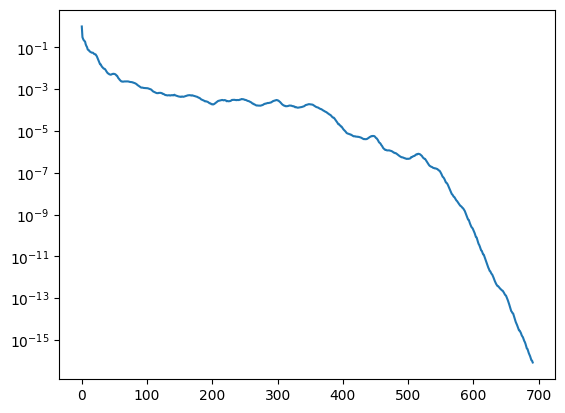

結果のノルム: 1.8553114473861812e-14
power=  1.1976947006579005e-06


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 67469    matrix size= 1386977.0
shift parameter= 1.02
minimum residual= 5.0702836109133295e-08  at iteraions:  1708


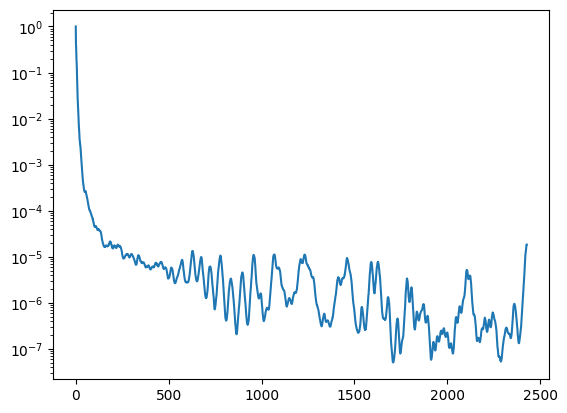

結果のノルム: 6.20232423053537e-06
power=  5.827247196648513e-08


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 65481    matrix size= 1332201.0
shift parameter= 1.05
minimum residual= 9.726051906025018e-17  at iteraions:  644


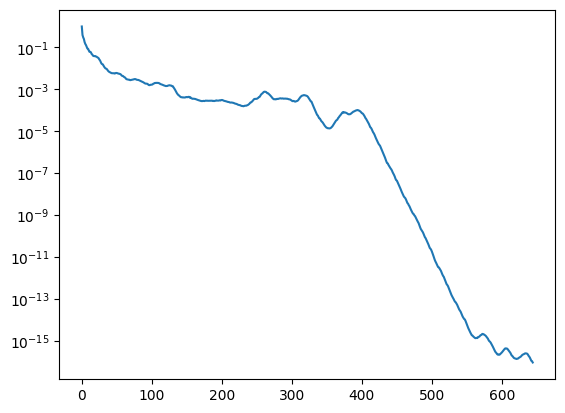

結果のノルム: 1.777988400065934e-14
power=  1.1506396331575095e-06


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 67469    matrix size= 1386977.0
shift parameter= 1.02
minimum residual= 1.1518267798923698e-08  at iteraions:  2128


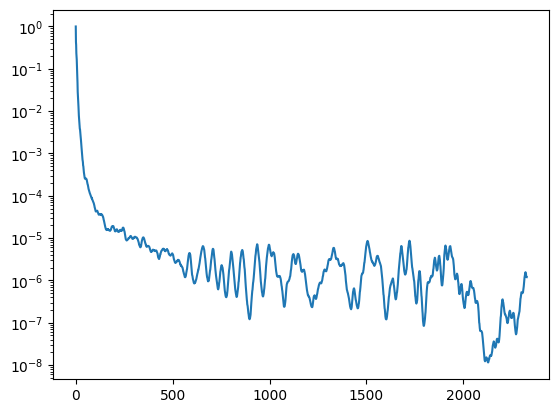

結果のノルム: 3.979446629788229e-07
power=  5.8291382875290216e-08


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 65481    matrix size= 1332201.0
shift parameter= 1.05
minimum residual= 9.929590326473632e-17  at iteraions:  579


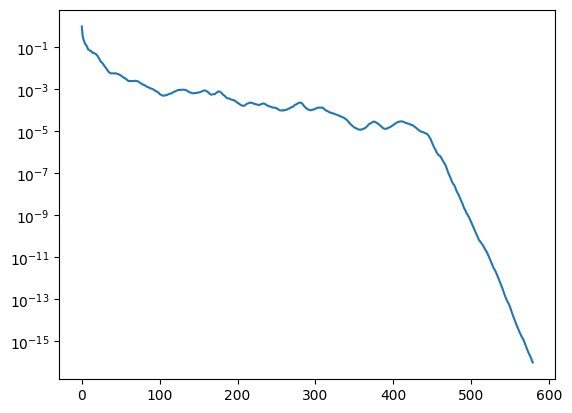

結果のノルム: 1.7646711494786413e-14
power=  1.14989877136546e-06


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 67469    matrix size= 1386977.0
shift parameter= 1.02
minimum residual= 6.23868648939642e-09  at iteraions:  2187


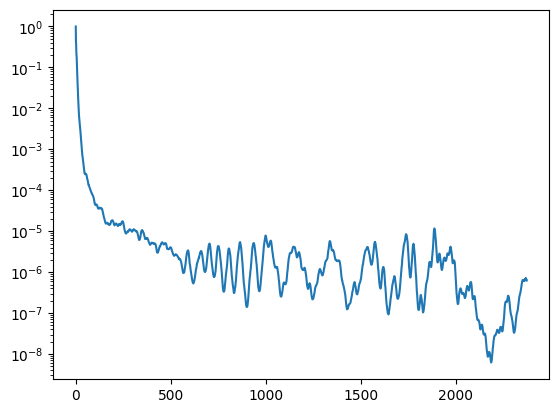

結果のノルム: 2.1854388023133258e-07
power=  5.8293246967534386e-08


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 65481    matrix size= 1332201.0
shift parameter= 1.05
minimum residual= 9.431880094945907e-17  at iteraions:  582


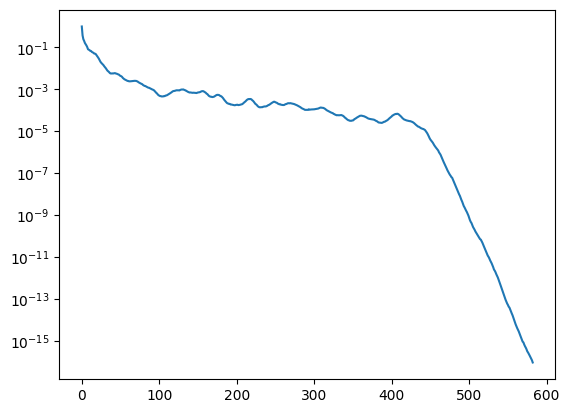

結果のノルム: 1.7397179178389787e-14
power=  1.152958091910203e-06


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 67469    matrix size= 1386977.0
shift parameter= 1.02
minimum residual= 3.926894749348179e-09  at iteraions:  2264


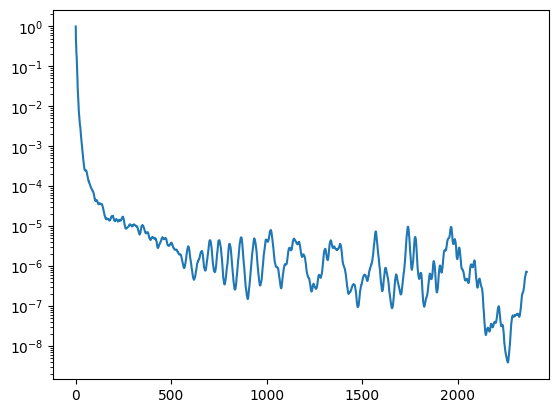

結果のノルム: 2.2395662930811454e-07
power=  5.8293706067940345e-08


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 65481    matrix size= 1332201.0
shift parameter= 1.05
minimum residual= 9.291377806316351e-17  at iteraions:  586


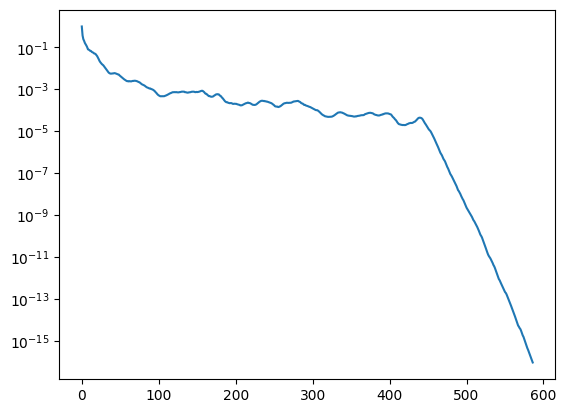

結果のノルム: 1.7496210104962814e-14
power=  1.1535413631700978e-06


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [2]:
fespsi = H1(mesh,  order=3, dirichlet="dir", complex=False, symmetry=True)
u, N = fespsi.TnT()

feskai = H1(mesh,  order=3, dirichlet="theta0|thetahalfpi", complex=False, symmetry=True)
v, M = fespsi.TnT()


gfkai = GridFunction(feskai)
gfkai.Set(atan2(y,x) )

Draw(gfkai)
for niter in range(5):
    gfpsi = GridFunction(fespsi)
    a = BilinearForm(fespsi)
    a += InnerProduct(Cross(grad(N),grad(gfkai)),Cross(grad(u),grad(gfkai)))*dx
    f = LinearForm(fespsi)
    f += InnerProduct(Cross(grad(N),grad(gfkai)),B)*dx
    a.Assemble()
    f.Assemble()

    gfpsi=solver.iccg_solve(fespsi, gfpsi, a, f.vec.FV(), tol=1.e-16, max_iter=1000, accel_factor=0, 
                         logplot=True, complex=False, cpp_solver=cpp_solver) 

    #gfpsi.vec.data = a.mat.Inverse(fespsi.FreeDofs()) * f.vec
    Draw(gfpsi, mesh, order=3)
    #Draw(Cross(grad(gfpsi),grad(gfkai)), mesh, order=3)

    gfkai = GridFunction(feskai)
    g=atan2(y,x)
    gfkai.Set(g, BND)

    # kai=0 on "theta0" and kai=pi/2 on "thetahalfpi"
    a = BilinearForm(feskai)
    a += InnerProduct(Cross(grad(gfpsi),grad(M)),Cross(grad(gfpsi),grad(v)))*dx
    f = LinearForm(feskai)
    f += InnerProduct(Cross(grad(gfpsi),grad(M)),B)*dx
    a.Assemble()
    f.Assemble()

    r=f.vec-a.mat * gfkai.vec

    gfkai=solver.iccg_solve(feskai, gfkai, a, r.Evaluate(), tol=1.e-16, max_iter=1000, accel_factor=0, 
                         logplot=True, complex=False, cpp_solver=cpp_solver) 
    #gfkai.vec.data = a.mat.Inverse(fes.FreeDofs()) * f.vec
    Draw(gfkai, mesh, order=3)

In [3]:
Draw(gfpsi, mesh, order=3)
Draw(gfkai, mesh, order=3)
Draw(Cross(grad(gfpsi),grad(gfkai)), mesh, order=3)
Draw(B, mesh, order=3)




WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

psi  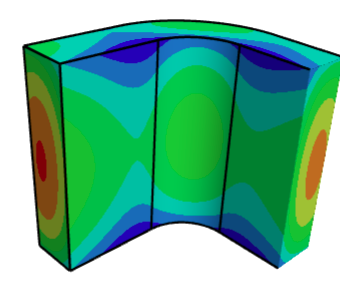
   kai  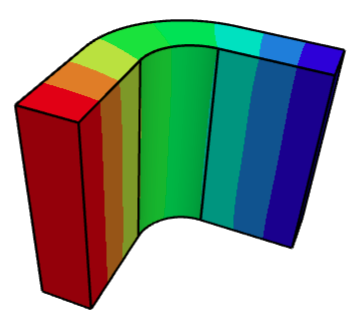
   
Cross(grad(gfpsi),grad(gfkai))  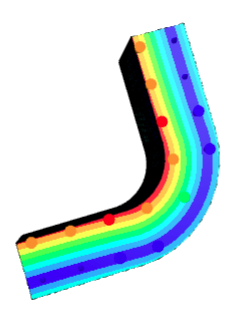
  Bgiven 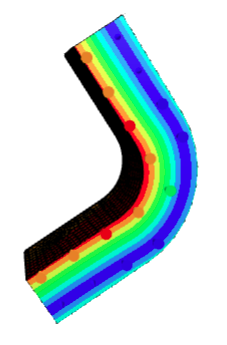